In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-life-impact-and-metadata-analysis-datasets/netflix_titles.csv
/kaggle/input/netflix-life-impact-and-metadata-analysis-datasets/Netflix Life Impact Dataset (NLID).csv
/kaggle/input/user-item-interaction/user-item_interaction.csv
/kaggle/input/metadata/metadata.csv


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/kaggle/input/netflix-life-impact-and-metadata-analysis-datasets/Netflix Life Impact Dataset (NLID).csv")
df.head()

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y


In [3]:
#basic libraries
import pandas as pd
import numpy as np
import os
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


**DATASET 1 : metadata.csv**

In [4]:
#DATASET 1 df: METADATA (metadata.csv)
import pandas as pd
df=pd.read_csv("/kaggle/input/netflix-life-impact-and-metadata-analysis-datasets/Netflix Life Impact Dataset (NLID).csv")

#added column: Movie_id
df["Movie_id"]=0
df["Movie_id"]=range(82)
#Rename
df.rename(columns={"Average Rating":"Rating"}, inplace=True)
df.rename(columns={"Review Highlights":"Tag"}, inplace=True)
#Drop
df=df.drop(columns=['Meaningful Advice Taken'])
df=df.drop(columns=['Minute of Life-Changing Insight'])
#splitting 'Suggested to Friends/Family (Y/N %)' into %and char.And converting % into int
import pandas as pd
df[["percentage", "response"]] = df["Suggested to Friends/Family (Y/N %)"].str.split(" ", expand=True)

df["percentage"] = df["percentage"].str.replace("%", "", regex=False).astype(int)

df.drop(columns=["Suggested to Friends/Family (Y/N %)"], inplace=True)

#new name saved in working dir : metadata.csv
#Loaded using pandas : metadata.csv
df.to_csv("/kaggle/working/metadata.csv",index=False)
df_load=pd.read_csv("/kaggle/working/metadata.csv")
df_load.head()


,Movie Title,Genre,Release Year,Rating,Number of Reviews,Tag,How Discovered,Movie_id,percentage,response
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",Friend suggested,0,92,Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",Social media,1,88,Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",Netflix recommendation,2,85,Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",Friend suggested,3,95,Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",Social media,4,80,Y


In [5]:

#table created for dataset 2
import pandas as pd
import numpy as np
import random

rows=82

# watch time between 0 and 145 minutes                             behaviour data for dataset
watch_time = np.random.randint(0, 146, size=82)
# completion rate proportional to watch_time but capped at 100
completion_rate = np.minimum((watch_time / 145 * 100).astype(int), 100)
# clicks/views → 0 or 1
clicks_views = np.random.randint(0, 2, size=82)
# likes → 0 or 1
likes = np.random.randint(0, 2, size=82)



df2=pd.DataFrame({"User_id":range(82),
                  "Movie_id":range(82),
                  "Rating":np.random.randint(2,11,size=rows),
                  "Timestamp":pd.date_range(start="2025-01-01",periods=rows,freq="D"),
                  "watch_time": watch_time,
                  "completion_rate": completion_rate,
                  "clicks_views": clicks_views,
                  "likes": likes
                    })



#data cleaning : datetime,integer values(User_id, Movie_id,Rating)
df2['Timestamp']=pd.to_datetime(df2['Timestamp'])
#verify
df2['year']=df2['Timestamp'].dt.year
df2['month']=df2['Timestamp'].dt.month
df2['day']=df2['Timestamp'].dt.day
df2.head()


,User_id,Movie_id,Rating,Timestamp,watch_time,completion_rate,clicks_views,likes,year,month,day
0,0,0,3,2025-01-01,83,57,1,0,2025,1,1
1,1,1,3,2025-01-02,56,38,1,0,2025,1,2
2,2,2,3,2025-01-03,92,63,0,0,2025,1,3
3,3,3,6,2025-01-04,61,42,1,0,2025,1,4
4,4,4,10,2025-01-05,0,0,0,0,2025,1,5


**DATASET 2 : user-item_interaction**

In [6]:
#DATASET 2 df2: USER-ITEM INTERACTION (user-item_interaction.csv)
import pandas as pd
import numpy as np
#user-item_interaction.csv created : In Working dir
df2.to_csv("/kaggle/working/user-item_interaction.csv",index=False)


#to load user-item_interaction.csv 
df2_load=pd.read_csv("/kaggle/working/user-item_interaction.csv")
df2_load.head()

,User_id,Movie_id,Rating,Timestamp,watch_time,completion_rate,clicks_views,likes,year,month,day
0,0,0,3,2025-01-01,83,57,1,0,2025,1,1
1,1,1,3,2025-01-02,56,38,1,0,2025,1,2
2,2,2,3,2025-01-03,92,63,0,0,2025,1,3
3,3,3,6,2025-01-04,61,42,1,0,2025,1,4
4,4,4,10,2025-01-05,0,0,0,0,2025,1,5


**CLEANING : metadata.csv**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#file path
a_set = pd.read_csv("/kaggle/working/metadata.csv")
b_set = pd.read_csv("/kaggle/working/user-item_interaction.csv")

# Remove duplicates by Movie-id
a_set = a_set.drop_duplicates(subset=["Movie_id"])

# Handle missing values
a_set["Genre"] = a_set["Genre"].fillna("Unknown")
a_set["Tag"] = a_set["Tag"].fillna("No Tag")


# Remove out-of-range years or ratings - outliers
a_set = a_set[(a_set["Release Year"].between(1900, 2025, inclusive="both")) | a_set["Release Year"].isna()]
a_set = a_set[(a_set["Rating"].between(0, 10, inclusive="both")) | a_set["Rating"].isna()]

a_set.head()


,Movie Title,Genre,Release Year,Rating,Number of Reviews,Tag,How Discovered,Movie_id,percentage,response
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",Friend suggested,0,92,Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",Social media,1,88,Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",Netflix recommendation,2,85,Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",Friend suggested,3,95,Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",Social media,4,80,Y


**EXPLORATORY DATA ANALYSIS : metadata.csv**


=== Metadata Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie Title        82 non-null     object 
 1   Genre              82 non-null     object 
 2   Release Year       82 non-null     int64  
 3   Rating             82 non-null     float64
 4   Number of Reviews  82 non-null     int64  
 5   Tag                82 non-null     object 
 6   How Discovered     82 non-null     object 
 7   Movie_id           82 non-null     int64  
 8   percentage         82 non-null     int64  
 9   response           82 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 6.5+ KB
None

Missing values in Metadata:
Movie Title          0
Genre                0
Release Year         0
Rating               0
Number of Reviews    0
Tag                  0
How Discovered       0
Movie_id             0
percentage        

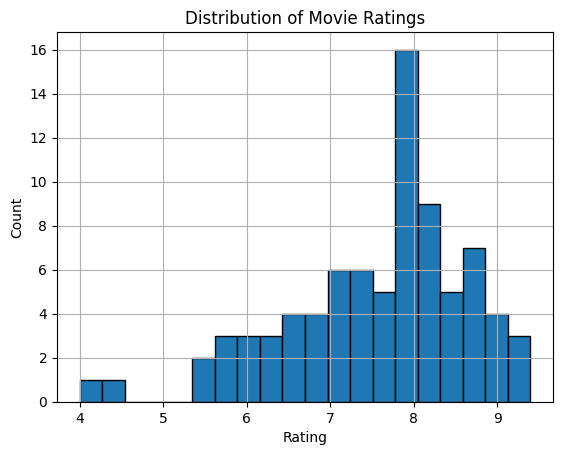

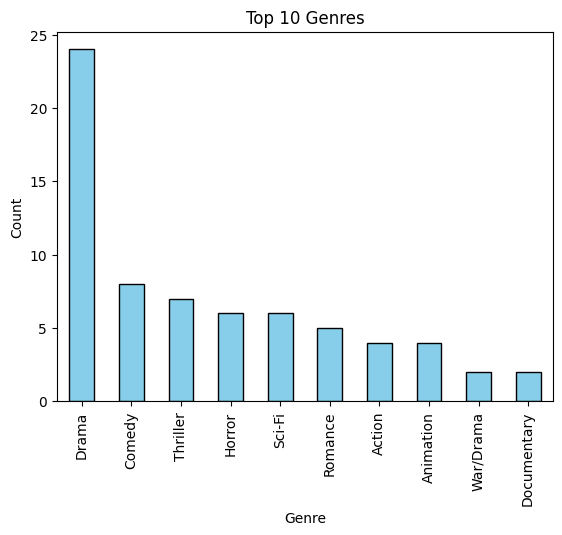

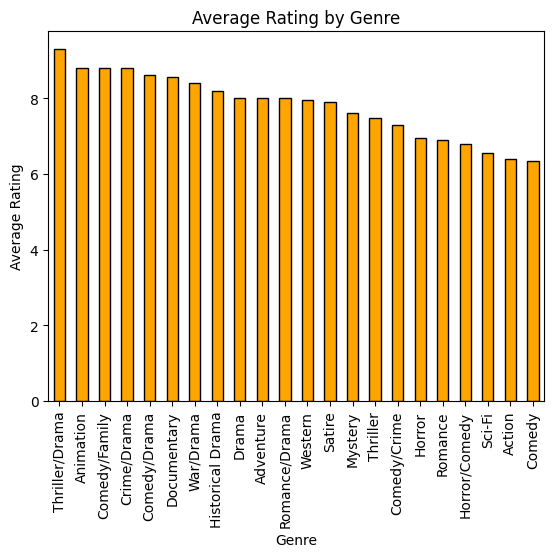

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("\n=== Metadata Info ===")
print(a_set.info())
print("\nMissing values in Metadata:")
print(a_set.isna().sum())

# Rating distribution : hist()
a_set["Rating"].hist(bins=20, edgecolor='black')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
# Top Genres : bar graph
a_set["Genre"].value_counts().head(10).plot(kind="bar", color="skyblue", edgecolor='black')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()
# Average rating by genre :bar graph
a_set.groupby("Genre")["Rating"].mean().sort_values(ascending=False).plot(kind="bar", color="orange", edgecolor='black')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.show()


**CLEANING : user-item_interaction.csv**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#file path
a_set = pd.read_csv("/kaggle/working/metadata.csv")
b_set = pd.read_csv("/kaggle/working/user-item_interaction.csv")

# --- IDs ---
b_set["User_id"] = pd.to_numeric(b_set["User_id"], errors="coerce").astype("Int64")
b_set["Movie_id"] = pd.to_numeric(b_set["Movie_id"], errors="coerce").astype("Int64")

# --- Rating ---
b_set["Rating"] = pd.to_numeric(b_set["Rating"], errors="coerce")
# Keep ratings only in 0–10 range
b_set = b_set[(b_set["Rating"].between(0, 10)) | (b_set["Rating"].isna())]

# --- Timestamp ---
b_set["Timestamp"] = pd.to_datetime(b_set["Timestamp"], errors="coerce")

# --- Watch_time ---
b_set["watch_time"] = pd.to_numeric(b_set["watch_time"], errors="coerce")
# Drop impossible values (negative, too large)
b_set = b_set[(b_set["watch_time"] >= 0) | (b_set["watch_time"].isna())]

# --- Completion_rate ---
b_set["completion_rate"] = (
    b_set["completion_rate"].astype(str).str.replace("%","", regex=False)
)
b_set["completion_rate"] = pd.to_numeric(b_set["completion_rate"], errors="coerce")
# Convert to fraction 0–1 if stored as %
if b_set["completion_rate"].max() > 1:
    b_set["completion_rate"] = b_set["completion_rate"] / 100

# --- Click_views ---
# If text values like 'Yes/No', map to binary
b_set["clicks_views"] = (
    b_set["clicks_views"].replace({"Yes":1, "No":0})
)
b_set["clicks_views"] = pd.to_numeric(b_set["clicks_views"], errors="coerce").fillna(0).astype(int)

# --- Likes ---
# Map text to binary (Like=1, Dislike=0)
b_set["likes"] = (
    b_set["likes"].replace({"Like":1, "Dislike":0})
)
b_set["likes"] = pd.to_numeric(b_set["likes"], errors="coerce").fillna(0).astype(int)

b_set.head()


,User_id,Movie_id,Rating,Timestamp,watch_time,completion_rate,clicks_views,likes,year,month,day
0,0,0,3,2025-01-01,83,0.57,1,0,2025,1,1
1,1,1,3,2025-01-02,56,0.38,1,0,2025,1,2
2,2,2,3,2025-01-03,92,0.63,0,0,2025,1,3
3,3,3,6,2025-01-04,61,0.42,1,0,2025,1,4
4,4,4,10,2025-01-05,0,0.00,0,0,2025,1,5


**EXPLORATORY DATA ANALYSIS : user-item_interaction.csv**


=== User-Interactions Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_id          82 non-null     int64 
 1   Movie_id         82 non-null     int64 
 2   Rating           82 non-null     int64 
 3   Timestamp        82 non-null     object
 4   watch_time       82 non-null     int64 
 5   completion_rate  82 non-null     int64 
 6   clicks_views     82 non-null     int64 
 7   likes            82 non-null     int64 
 8   year             82 non-null     int64 
 9   month            82 non-null     int64 
 10  day              82 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 7.2+ KB
None

Missing values in Interactions: Nil
User_id            0
Movie_id           0
Rating             0
Timestamp          0
watch_time         0
completion_rate    0
clicks_views       0
likes              0
year               

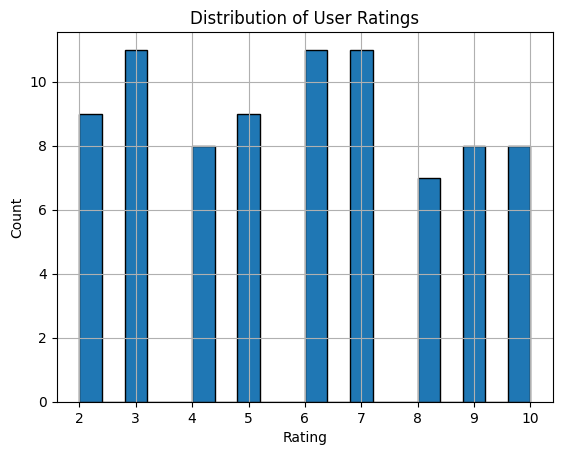

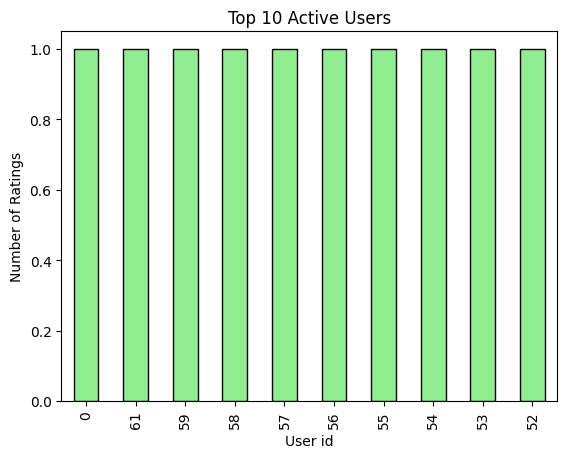

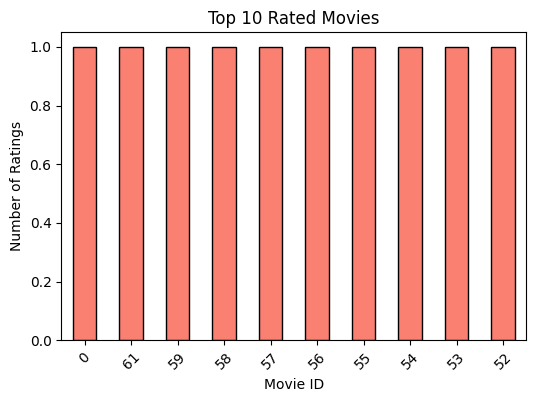

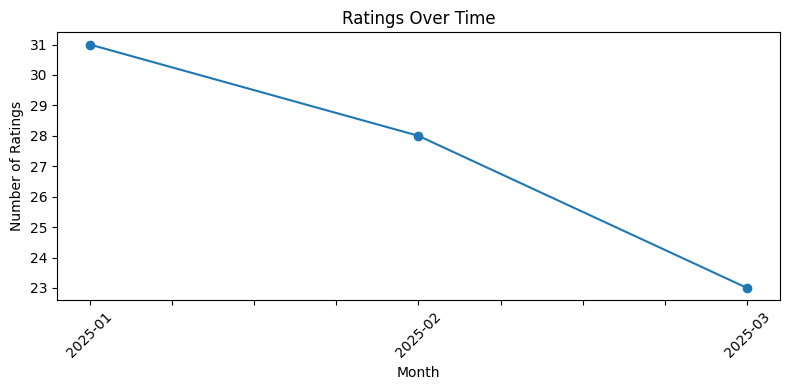

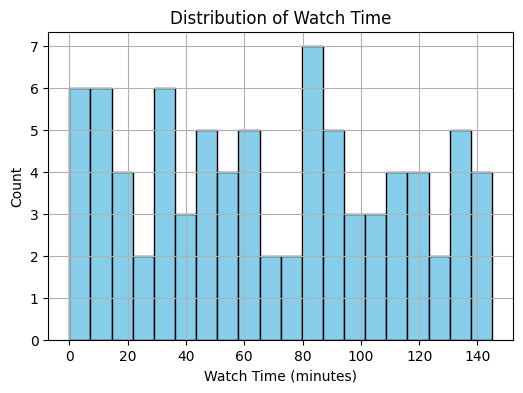

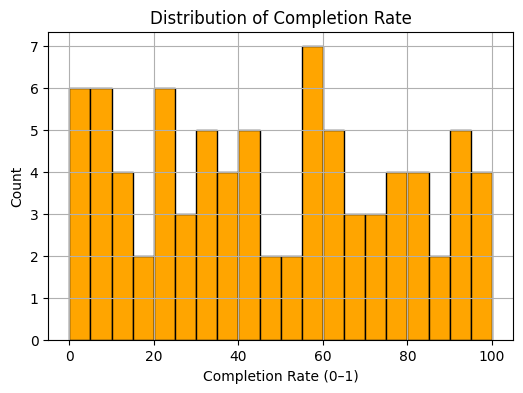

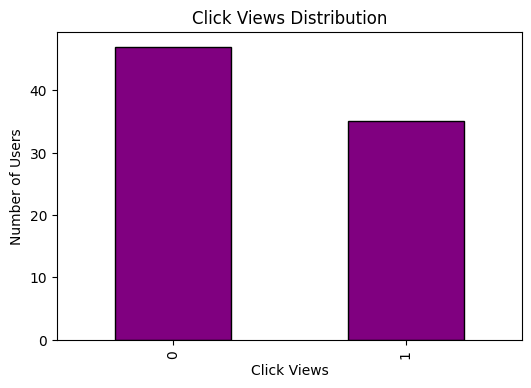

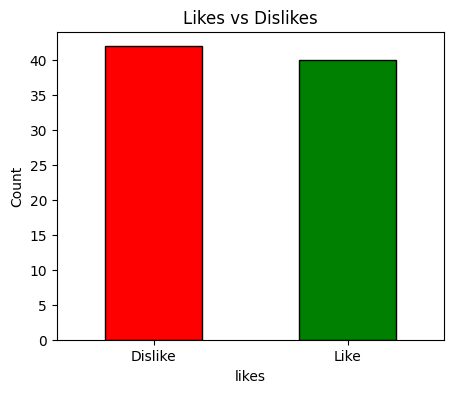


Correlation between engagement metrics:
                   Rating  watch_time  completion_rate  clicks_views     likes
Rating           1.000000   -0.243735        -0.241883     -0.141363  0.132210
watch_time      -0.243735    1.000000         0.999950      0.075517 -0.083687
completion_rate -0.241883    0.999950         1.000000      0.074406 -0.084382
clicks_views    -0.141363    0.075517         0.074406      1.000000 -0.144369
likes            0.132210   -0.083687        -0.084382     -0.144369  1.000000


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#file path
b_set = pd.read_csv("/kaggle/working/user-item_interaction.csv")

print("\n=== User-Interactions Info ===")
print(b_set.info())
print("\nMissing values in Interactions: Nil")
print(b_set.isna().sum())

# Rating distribution
b_set["Rating"].hist(bins=20, edgecolor='black')
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


#Ratings per user
top_users = b_set["User_id"].value_counts().head(10)
top_users.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 10 Active Users")
plt.xlabel("User id")
plt.ylabel("Number of Ratings")
plt.show()

# Ratings per movie
plt.figure(figsize=(6,4))
b_set["Movie_id"].value_counts().head(10).plot(kind="bar", color="salmon", edgecolor='black')
plt.title("Top 10 Rated Movies")
plt.xlabel("Movie ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()

# Activity over time
b_set['Timestamp']=pd.to_datetime(b_set['Timestamp'],errors="coerce")
plt.figure(figsize=(8,4))
ratings_over_time = b_set.groupby(b_set['Timestamp'].dt.to_period("M")).size()
ratings_over_time.index = ratings_over_time.index.astype(str)  # cleaner x-axis
ratings_over_time.plot(kind="line", marker='o')
plt.title("Ratings Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Watch time distribution ---
plt.figure(figsize=(6,4))
b_set["watch_time"].dropna().hist(bins=20, edgecolor="black", color="skyblue")
plt.title("Distribution of Watch Time")
plt.xlabel("Watch Time (minutes)")
plt.ylabel("Count")
plt.show()

# --- Completion rate distribution ---
plt.figure(figsize=(6,4))
b_set["completion_rate"].dropna().hist(bins=20, edgecolor="black", color="orange")
plt.title("Distribution of Completion Rate")
plt.xlabel("Completion Rate (0–1)")
plt.ylabel("Count")
plt.show()

# --- Click views counts ---
plt.figure(figsize=(6,4))
b_set["clicks_views"].value_counts().plot(kind="bar", color="purple", edgecolor="black")
plt.title("Click Views Distribution")
plt.xlabel("Click Views")
plt.ylabel("Number of Users")
plt.show()

# --- Likes vs Dislikes ---
plt.figure(figsize=(5,4))
b_set["likes"].value_counts().plot(kind="bar", color=["red","green"], edgecolor="black")
plt.title("Likes vs Dislikes")
plt.xticks(ticks=[0,1], labels=["Dislike","Like"], rotation=0)
plt.ylabel("Count")
plt.show()

# --- Correlation check ---
print("\nCorrelation between engagement metrics:")
print(b_set[["Rating","watch_time","completion_rate","clicks_views","likes"]].corr())


**COllABORATIVE FILTERING - SVD (Singular Value Decomposition) : ON user-item_interaction.csv**

In [11]:
#install surprise 
!pip install scikit-surprise

#import 
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split


**SVD WITH EVALUATION (RMSE, MAE, MEAN, STD.DEVIATION)**

In [12]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split


#  For Collaborative Filtering (SVD)  - user-item_interaction.csv
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Load user-item_interaction.csv
user_df = pd.read_csv("/kaggle/working/user-item_interaction.csv")

# Engagement score (your custom formula)
user_df['engagement'] = (
    0.3*user_df['watch_time'] + 
    0.2*user_df['completion_rate'] + 
    0.2*user_df['clicks_views'] + 
    0.3*user_df['likes']
)

# Normalize engagement to 0–5
user_df['engagement_norm'] = (user_df['engagement'] - user_df['engagement'].min()) / \
                             (user_df['engagement'].max() - user_df['engagement'].min()) * 5

# Final rating
user_df['final_rating'] = user_df['Rating'] + 0.5*user_df['engagement_norm']

# Dataset --> Surprise dataset conversion
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(user_df[['User_id','Movie_id','final_rating']], reader)

# Train-test split
trainset, testset = train_test_split(dataset, test_size=0.3)

# Train SVD model
svd_model = SVD()
svd_model.fit(trainset)



# Predictions
predictions = svd_model.test(testset)

# Evaluate
cross_validate(svd_model, dataset, measures=['RMSE', 'MAE'], cv=10, verbose=True)



#Making Recommendations
# Predict rating for a specific user & movie
user_id = 10
movie_id = 55
pred = svd_model.predict(user_id, movie_id)
print(pred.est)  # estimated rating





Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.6400  3.1082  3.9161  3.0701  3.4706  2.8961  3.3674  3.4791  2.8039  2.8950  3.1647  0.3689  
MAE (testset)     2.1829  2.4497  3.3971  2.4749  3.1127  2.4360  2.6826  2.9710  2.2500  2.6058  2.6563  0.3705  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    
5


**PRECISION@K EVALUATED**

In [13]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

from collections import defaultdict

def precision_at_k(predictions, k=5, threshold=3.5):
    """Return Precision@K for each user and average."""
    # Map predictions to each user
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    for uid, ratings in user_est_true.items():
        # Sort by estimated rating (descending order)
        ratings.sort(key=lambda x: x[0], reverse=True)
        # Top K items
        top_k = ratings[:k]

        # Count relevant items (true rating >= threshold)
        n_rel = sum((true_r >= threshold) for (_, true_r) in top_k)

        precisions[uid] = n_rel / k if k else 0

    # Return per-user precision and average precision
    return precisions, sum(prec for prec in precisions.values()) / len(precisions)




# Already trained your model
predictions = svd_model.test(testset)

# Evaluate Precision@K
precisions, avg_precision = precision_at_k(predictions, k=5, threshold=3.5)

print(f"Average Precision@5: {avg_precision:.3f}")


Average Precision@5: 0.192


**CONTENT BASED FILTERING :  ON metadata**

In [14]:
# For Content-based filtering (CBF) setup - Metadata.csv


import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load metadata.csv
meta = pd.read_csv("/kaggle/working/metadata.csv")

# To combined text features
meta['combined_features'] = (
    meta['Movie Title'].fillna('') + ' ' +
    meta['Genre'].fillna('') + ' ' +
    meta['Tag'].fillna('') + ' ' +
    meta['Release Year'].astype(str)
)

# TF-IDF and cosine similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(meta['combined_features']) # text --> vector conversion
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) # to find similarity score

# Map titles to index
indices = pd.Series(meta.index, index=meta['Movie Title']).drop_duplicates()

# Function to get similar movies (with scores)
def recommend_movies(title, n=5, return_scores=False):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # exclude itself
    
    movie_indices = [i[0] for i in sim_scores]
    movies = meta[['Movie_id','Movie Title','Genre','Release Year']].iloc[movie_indices]

    if return_scores:
        return movies.reset_index(drop=True), sim_scores
    else:
        return movies.reset_index(drop=True)


In [15]:
print(recommend_movies("Inception", n=5))

   Movie_id              Movie Title   Genre  Release Year
0        74  The Cloverfield Paradox  Sci-Fi          2018
1        21         The Midnight Sky  Sci-Fi          2020
2        75                     Mute  Sci-Fi          2018
3        55            The Discovery  Sci-Fi          2017
4        34               Extraction  Action          2020


**HYBRID MODEL
( user-item_interaction.csv : SVD [Collaborative filtering + matrix factorization , 
                   metadata : content based filtering using TF-IDF )**

                   

In [16]:
#hybrid model:
# For Content-based filtering (CBF) setup - metadata.csv

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Metadata.csv
meta = pd.read_csv("metadata.csv")


# Hybrid Recommender System
def hybrid_recommend(user_id, title, alpha=0.7, n=5):
    """
    Hybrid recommendation:
    - user_id: user for CF
    - title: seed movie for CBF
    - alpha: weight between CF and CBF
    - n: number of recommendations
    """
    # Get CBF candidates
    cb_movies, sim_scores = recommend_movies(title, n=n, return_scores=True)
    
    hybrid_results = []

    for (idx, sim) in sim_scores:
        movie_row = meta.iloc[idx]
        movie_id = movie_row['Movie_id']

        # CF prediction
        cf_pred = svd_model.predict(user_id, movie_id).est

        # Hybrid score
        hybrid_score = alpha * cf_pred + (1 - alpha) * sim

        hybrid_results.append({
            'Movie_id': movie_id,
            'Movie Title': movie_row['Movie Title'],
            'Genre': movie_row['Genre'],
            'Release Year': movie_row['Release Year'],
            'CF_Score': round(cf_pred, 3),
            'CBF_Score': round(sim, 3),
            'Hybrid_Score': round(hybrid_score, 3)
        })

    # Sort by hybrid score
    hybrid_results = sorted(hybrid_results, key=lambda x: x['Hybrid_Score'], reverse=True)

    return pd.DataFrame(hybrid_results)


In [17]:
# working explained :
# hybrid recommendations for user_id=10 based on "Inception"
recs = hybrid_recommend(user_id=10, title="Inception", alpha=0.7, n=10)
print(recs)


   Movie_id              Movie Title          Genre  Release Year  CF_Score  \
0        74  The Cloverfield Paradox         Sci-Fi          2018         5   
1        21         The Midnight Sky         Sci-Fi          2020         5   
2        75                     Mute         Sci-Fi          2018         5   
3        55            The Discovery         Sci-Fi          2017         5   
4        34               Extraction         Action          2020         5   
5        63         Rim of the World         Sci-Fi          2019         5   
6        39               Uncut Gems       Thriller          2019         5   
7        49           The Laundromat          Drama          2019         5   
8         7           The Half of It  Romance/Drama          2020         5   
9        14      The Florida Project          Drama          2017         5   

   CBF_Score  Hybrid_Score  
0      0.257         3.577  
1      0.219         3.566  
2      0.162         3.549  
3      0.159  

**FINE TUNE**

In [18]:
# Example: feedback table (user actions after seeing recommendations)
feedback_df = pd.DataFrame({
    "User_id": [10, 10, 10],
    "Movie_id": [101, 102, 103],
    "Feedback": [1, 0, -1]  
    # 1 = like, 0 = neutral (skipped), -1 = dislike
})


#Incorporate feedback into rating
# Merge feedback into user_df
user_df = user_df.merge(feedback_df, on=["User_id","Movie_id"], how="left")

# Convert feedback into weight adjustment
user_df['feedback_adj'] = user_df['Feedback'].fillna(0) * 1.0  # scale likes/dislikes

# Fine-tuned rating
user_df['final_rating_finetuned'] = user_df['final_rating'] + user_df['feedback_adj']

# Keep ratings in [1, 5]
user_df['final_rating_finetuned'] = user_df['final_rating_finetuned'].clip(1, 5)





#update CF with feedback 
dataset = Dataset.load_from_df(
    user_df[['User_id','Movie_id','final_rating_finetuned']], reader
)
trainset, testset = train_test_split(dataset, test_size=0.3)
svd_model.fit(trainset)



#Reweight hybrid score 

def apply_feedback_penalty(hybrid_results, feedback_df, user_id):
    feedback = feedback_df[feedback_df['User_id'] == user_id]
    dislike_ids = feedback[feedback['Feedback'] == -1]['Movie_id'].values
    
    for row in hybrid_results:
        if row['Movie_id'] in dislike_ids:
            row['Hybrid_Score'] *= 0.5  # reduce score if disliked
    return hybrid_results


**MOCK WEB INTERFACE**

In [19]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdowns
user_dropdown = widgets.Dropdown(
    options=sorted(user_df['User_id'].unique()),
    description="User:"
)
movie_dropdown = widgets.Dropdown(
    options=sorted(meta['Movie Title'].unique()),
    description="Movie:"
)
alpha_slider = widgets.FloatSlider(
    value=0.7, min=0, max=1, step=0.1, description="Alpha"
)

# Output area
out = widgets.Output()

# Button
button = widgets.Button(description="Get Recommendations")

def on_button_click(b):
    with out:
        clear_output(wait=True)
        recs = hybrid_recommend(user_id=user_dropdown.value,
                                title=movie_dropdown.value,
                                alpha=alpha_slider.value, n=10)
        
        # Apply feedback penalty
        recs = apply_feedback_penalty(recs.to_dict('records'),
                                      feedback_df,
                                      user_dropdown.value)
        display(pd.DataFrame(recs))

button.on_click(on_button_click)

display(user_dropdown, movie_dropdown, alpha_slider, button, out)


Dropdown(description='User:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2…

Dropdown(description='Movie:', options=('13th', 'A Christmas Prince', 'Always Be My Maybe', 'Beasts of No Nati…

FloatSlider(value=0.7, description='Alpha', max=1.0)

Button(description='Get Recommendations', style=ButtonStyle())

Output()